Gold Price Prediction 

In [1]:
# Import Libries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV, RidgeCV, SGDRegressor
from sklearn.decomposition import PCA

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
df = pd.read_csv('../FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
# Shape of dataset

df.shape

(1718, 81)

In [4]:
# Describe of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1718.0,1.273234e+02,1.752699e+01,1.009200e+02,1.162200e+02,1.219150e+02,1.284275e+02,1.732000e+02
High,1718.0,1.278542e+02,1.763119e+01,1.009900e+02,1.165400e+02,1.223250e+02,1.290875e+02,1.740700e+02
Low,1718.0,1.267777e+02,1.739651e+01,1.002300e+02,1.157400e+02,1.213700e+02,1.278400e+02,1.729200e+02
Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
Adj Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
...,...,...,...,...,...,...,...,...
USO_High,1718.0,2.230715e+01,1.147867e+01,8.030000e+00,1.150000e+01,1.663500e+01,3.466750e+01,4.230000e+01
USO_Low,1718.0,2.190466e+01,1.137400e+01,7.670000e+00,1.130000e+01,1.604000e+01,3.411000e+01,4.130000e+01
USO_Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01
USO_Adj Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01


In [5]:
# Check missing values

df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [7]:
# Checking missing values

df.isnull().values.any()

False

In [8]:
# Converting date

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1718 non-null   datetime64[ns]
 1   Open           1718 non-null   float64       
 2   High           1718 non-null   float64       
 3   Low            1718 non-null   float64       
 4   Close          1718 non-null   float64       
 5   Adj Close      1718 non-null   float64       
 6   Volume         1718 non-null   int64         
 7   SP_open        1718 non-null   float64       
 8   SP_high        1718 non-null   float64       
 9   SP_low         1718 non-null   float64       
 10  SP_close       1718 non-null   float64       
 11  SP_Ajclose     1718 non-null   float64       
 12  SP_volume      1718 non-null   int64         
 13  DJ_open        1718 non-null   float64       
 14  DJ_high        1718 non-null   float64       
 15  DJ_low         1718 n

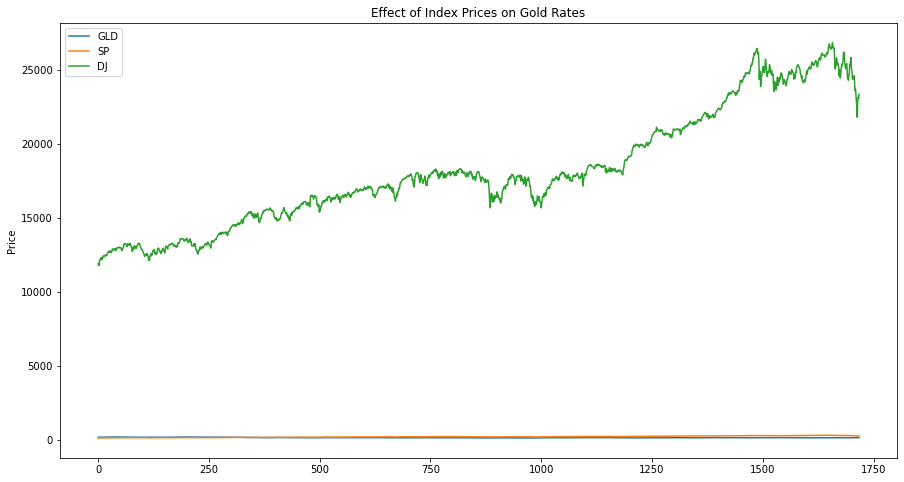

In [9]:
# Effect of index prices on gold rates

GLD_adj_close = df['Adj Close']
SP_adj_close = df['SP_Ajclose']
DJ_adj_close = df['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SP':SP_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index Prices on Gold Rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [10]:
# Computing daily returns of all features

def compute_daily_returns(df):
    """Compute and return the daily return values"""
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return


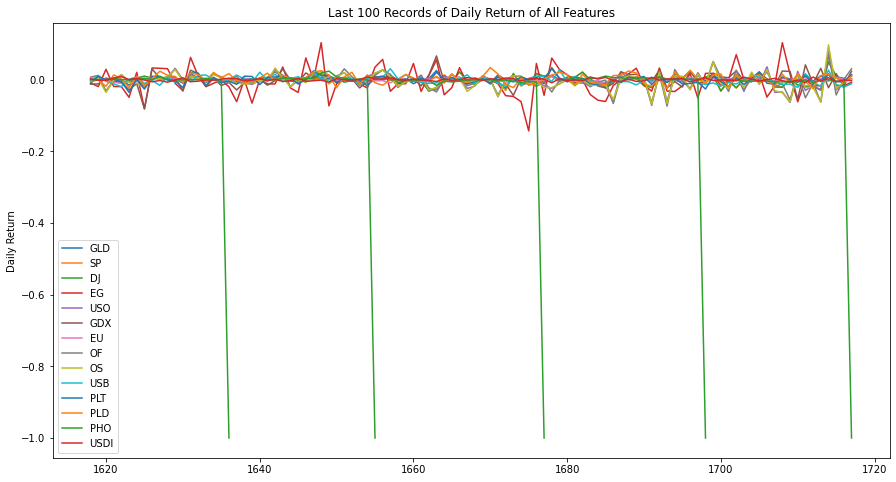

In [11]:
GLD_adj_close = df['Adj Close']
SP_adj_close = df['SP_Ajclose']
DJ_adj_close = df['DJ_Ajclose']
EG_adj_close = df['EG_Ajclose']
USO_adj_close = df['USO_Adj Close']
GDX_adj_close = df['GDX_Adj Close']
EU_price = df['EU_Price']
OF_price = df['OF_Price']
OS_price = df['OS_Price']
SF_price = df['SF_Price']
USB_price = df['USB_Price']
PLT_price = df['PLT_Price']
PLD_price = df['PLD_Price']
RHO_price = df['RHO_PRICE']
USDI_price = df['USDI_Price']

GLD_daily_return = compute_daily_returns(GLD_adj_close)
SP_daily_return = compute_daily_returns(SP_adj_close)
DJ_adj_return = compute_daily_returns(DJ_adj_close)
EG_adj_return = compute_daily_returns(EG_adj_close)
USO_adj_return = compute_daily_returns(USO_adj_close)
GDX_adj_return = compute_daily_returns(GDX_adj_close)
EU_return = compute_daily_returns(EU_price)
OF_price = compute_daily_returns(OF_price)
OS_price = compute_daily_returns(OS_price)
SF_price = compute_daily_returns(SF_price)
USB_price = compute_daily_returns(USB_price)
PLT_price = compute_daily_returns(PLT_price)
PLD_price = compute_daily_returns(PLD_price)
rho_price = compute_daily_returns(RHO_price)
usdi_price = compute_daily_returns(USDI_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SP':SP_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_adj_return,
                   'GDX':GDX_adj_return, 'EU':EU_return, 'OF':OF_price, 'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price, 
                   'PHO':rho_price, 'USDI':usdi_price})

daily_ax = df_d[-100:].plot(title='Last 100 Records of Daily Return of All Features', figsize=(15,8))

daily_ax.set_ylabel('Daily Return')
daily_ax.legend(loc='lower left')
plt.show()

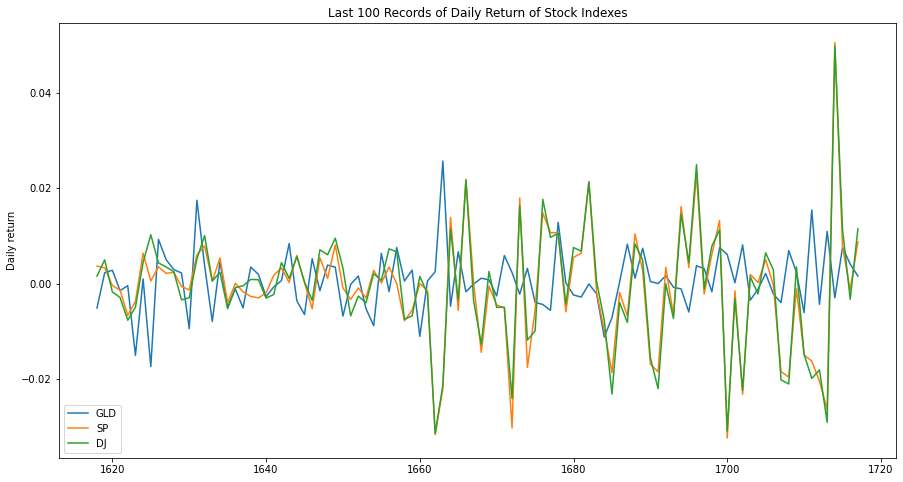

In [12]:
# Computing daily returns of stock indexes

df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SP':SP_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 Records of Daily Return of Stock Indexes', figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

<AxesSubplot:xlabel='PLD', ylabel='GLD'>

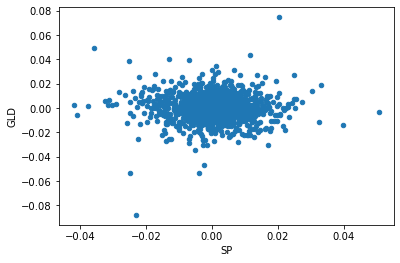

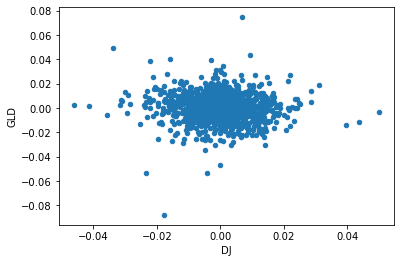

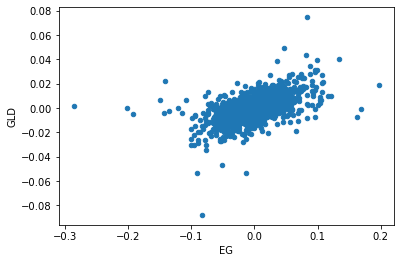

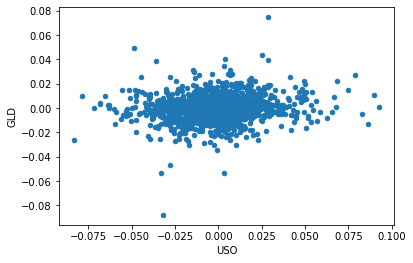

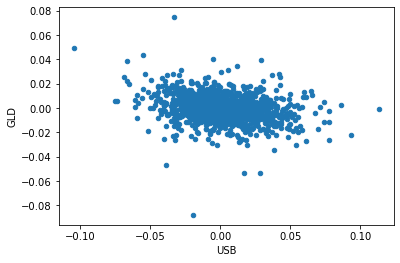

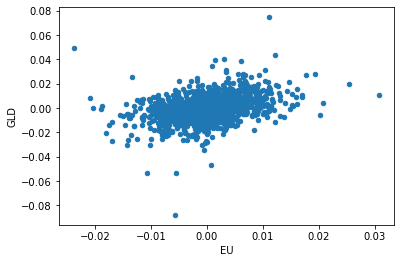

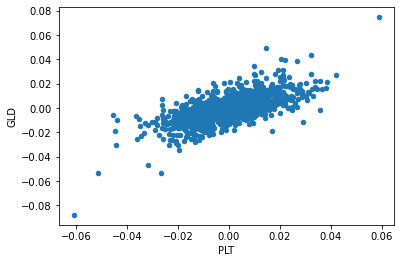

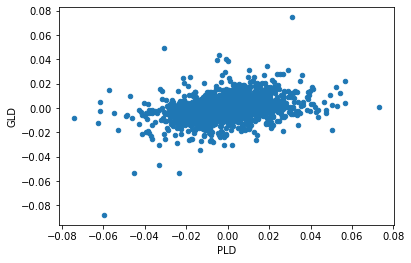

In [13]:
# Scatterplot 

df_d.plot(kind='scatter', x='SP', y='GLD')
df_d.plot(kind='scatter', x='DJ', y='GLD')
df_d.plot(kind='scatter', x='EG', y='GLD')
df_d.plot(kind='scatter', x='USO', y='GLD')
df_d.plot(kind='scatter', x='USB', y='GLD')
df_d.plot(kind='scatter', x='EU', y='GLD')
df_d.plot(kind='scatter', x='PLT', y='GLD')
df_d.plot(kind='scatter', x='PLD', y='GLD')


Mean = -8.65698612128203e-05
Standard Deviation = 0.00961153616700639
Kurtosis = 8.606584924918355


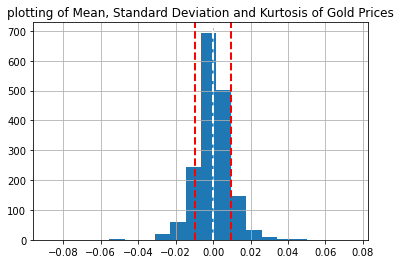

In [14]:
# Computing mean, standard deviation and kurtosis of Gold ETF daily return

mean = df_d['GLD'].mean()
std = df_d['GLD'].std()
kurt = df_d['GLD'].kurtosis()
print('Mean =', mean)
print('Standard Deviation =', std)
print('Kurtosis =', kurt)

# Plotting Histogram

df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.title("plotting of Mean, Standard Deviation and Kurtosis of Gold Prices")
plt.show()


Mean = 0.0005366024364688838
Standard Deviation = 0.008262309911393526
Kurtosis = 3.4557859039745233


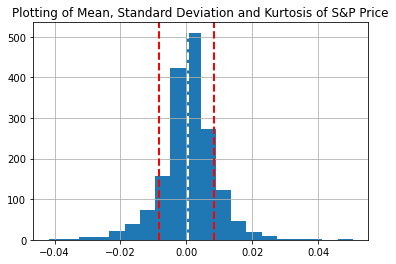

In [15]:
# Computing mean, standard deviation and kurtosis of S&P 500 Index daily return

mean = df_d['SP'].mean()
std = df_d['SP'].std()
kurt = df_d['SP'].kurtosis()
print('Mean =', mean)
print('Standard Deviation =', std)
print('Kurtosis =', kurt)

# Plotting Histogram

df_d['SP'].hist(bins=20)

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.title("Plotting of Mean, Standard Deviation and Kurtosis of S&P Price")
plt.show()

Mean = 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


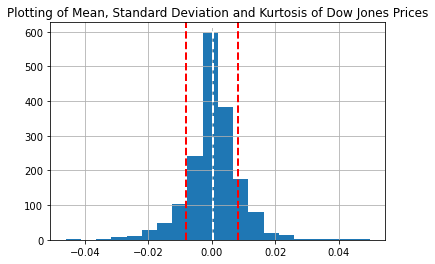

In [16]:
# Computing mean, standard deviation and kurtosis of Dow Jones Index daily return

mean = df_d['DJ'].mean()
std = df_d['DJ'].std()
kurt = df_d['DJ'].kurtosis()
print('Mean =', mean)
print('Standard Deviation=', std)
print('Kurtosis=', kurt)

# Plotting Histogram
df_d['DJ'].hist(bins=20)

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.title("Plotting of Mean, Standard Deviation and Kurtosis of Dow Jones Prices")
plt.show()

<AxesSubplot:>

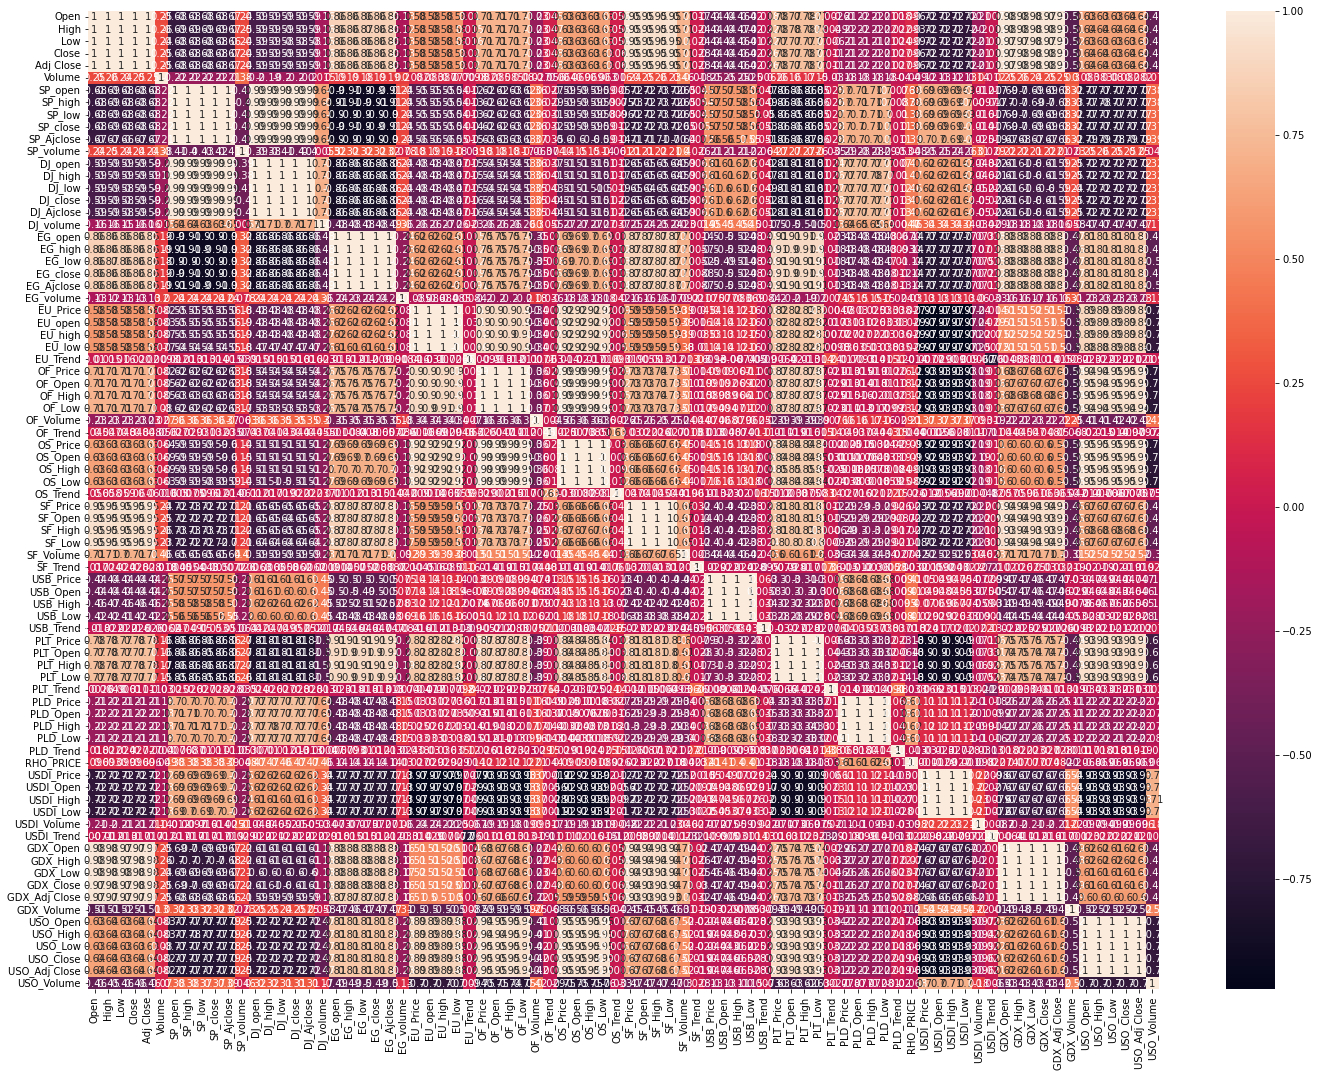

In [17]:
# Plotting correlation matrix

plt.figure(figsize=(24, 18))
sns.heatmap(df.corr(), annot=True)

In [18]:
# Remove Adj Close

X = df.drop(['Adj Close'], axis=1)
X = X.drop(['Close'], axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

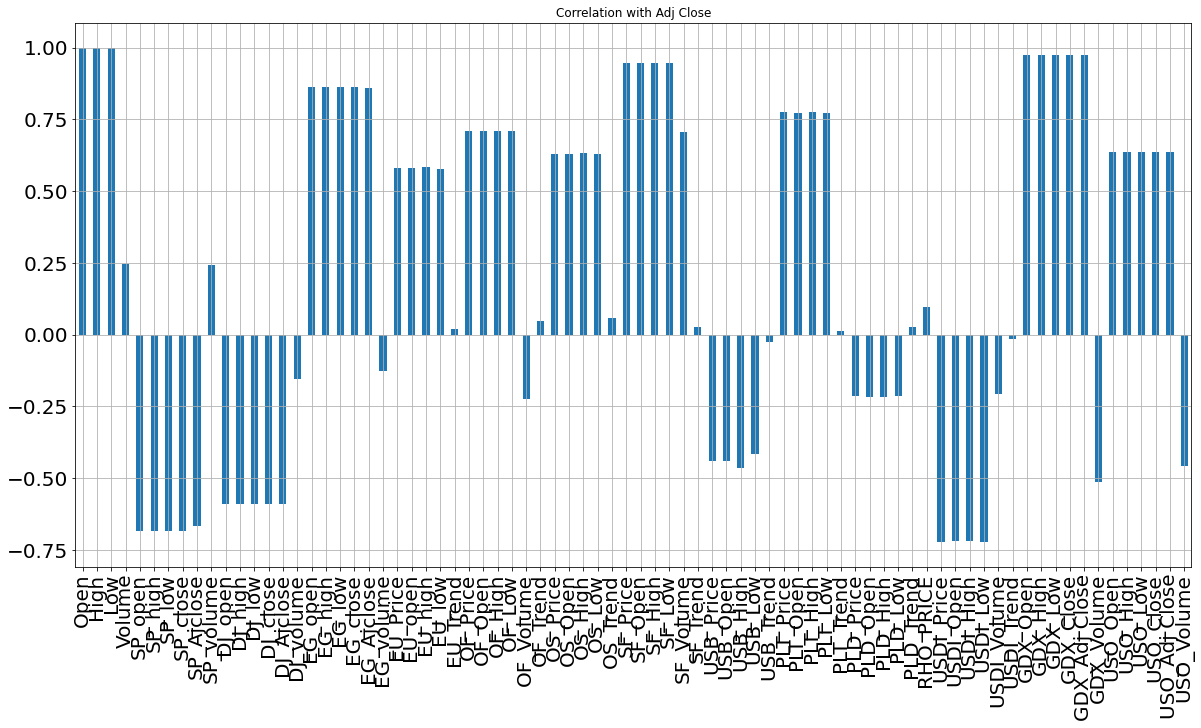

In [19]:
X.corrwith(df['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20, 
        rot = 90, grid = True)

In [20]:
corr_matrix = df.corr()
coef = corr_matrix["Adj Close"].sort_values(ascending=False)

corr_matrix


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,...,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,...,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,...,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,...,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Adj Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,...,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USO_High,0.634864,0.637208,0.633623,0.635311,0.635311,0.083064,-0.774626,-0.775482,-0.773550,-0.774799,...,0.614587,0.614766,0.600523,-0.522581,0.999857,1.000000,0.999818,0.999867,0.999867,-0.695678
USO_Low,0.634277,0.636538,0.633140,0.634732,0.634732,0.080475,-0.771235,-0.772154,-0.770087,-0.771396,...,0.613844,0.613931,0.599819,-0.523956,0.999848,0.999818,1.000000,0.999879,0.999879,-0.702665
USO_Close,0.635138,0.637483,0.633994,0.635675,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221
USO_Adj Close,0.635138,0.637483,0.633994,0.635675,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221


In [21]:
coef

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
SP_high      -0.684904
USDI_High    -0.720023
USDI_Open    -0.720140
USDI_Price   -0.721569
USDI_Low     -0.722078
Name: Adj Close, Length: 80, dtype: float64

In [22]:
# Positively Correlated Variables

pos_corr = coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [23]:
# Negatively Correlated Variables

neg_corr = coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

In [24]:
# Using technical indicators moving average convergence-divergence (MACD), relative strength index (RSI), Simple Moving Average (SMA), upper band/lower band and standard deviation

def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()
    
    up[up < 0] = 0
    down[down > 0] = 0
    
    rUp = up.ewm(com=periods, adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()
    
    rsi = 100 - 100 / (1+ rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df, periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV
    

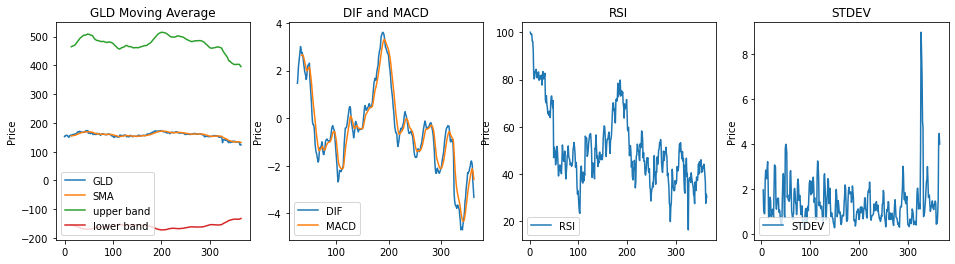

In [25]:
# Plotting technical indicators

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average', label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA", ax=axes[0])

# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])

# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD', label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI', label='RSI', ax=axes[2])

# Calculating Standard Deviation for GLD
STDEV = calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV', label='STDEV', ax=axes[3])

Open_Close = df.Open - df.Close

High_Low = df.High - df.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')



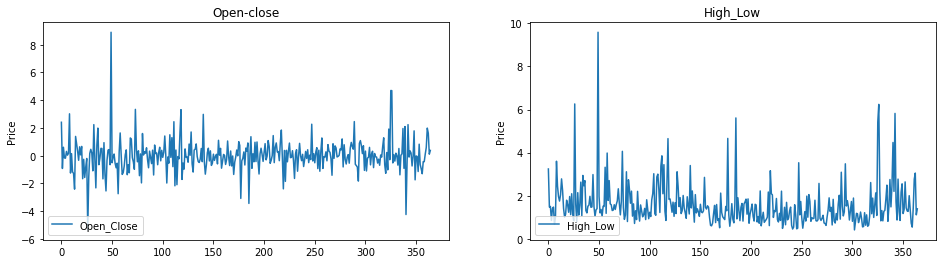

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close = df.Open - df.Close
Open_Close[:365].plot(title='Open-close', label='Open_Close', ax=axes[0])

High_Low = df.High - df.Low
High_Low[:365].plot(title='High_Low', label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')


In [27]:
test = df
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close'] = Open_Close
test ['High_Low'] = High_Low

# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])

display(test.head())

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,...,6126100,165.198666,495.595999,-165.198666,2.724443,2.641891,70.144545,1.562107,-0.219986,1.069992
34,2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,...,10237000,165.894667,497.684000,-165.894667,2.754381,2.667095,73.152763,1.594111,-2.319992,2.940002
35,2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,...,9045800,166.428000,499.284000,-166.428000,2.655845,2.664634,69.576023,1.575718,0.759995,2.460007
36,2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,...,4663500,166.856000,500.567999,-166.856000,2.511947,2.631843,68.148015,0.965153,1.989991,2.699997
37,2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,...,6008600,167.250666,501.751999,-167.250666,2.303734,2.562404,65.507009,1.059963,-0.649994,1.309997


In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [29]:
# Selecting feathure columns
feature_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume',
       'SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV',
       'Open_Close', 'High_Low']

In [30]:
# Normalizing the data with sklearn's MinMaxScaler

scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.906189,0.093811,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
34,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.916193,0.083807,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
35,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.923859,0.076141,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
36,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.930011,0.069989,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
37,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.935684,0.064316,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


In [31]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value

target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process----- \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.906189,0.093811,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
34,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.916193,0.083807,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
35,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.923859,0.076141,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
36,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.930011,0.069989,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
37,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.935684,0.064316,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


Shape of features :  (1685, 89)
Shape of target :  (1685, 1)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
1712,0.252767,0.249863,0.252304,0.249214,0.249214,0.131396,0.719499,0.732264,0.685249,0.680445,...,0.346662,0.221370,0.221370,0.778630,0.658641,0.648503,0.687759,0.071990,0.459268,0.050107
1713,0.258024,0.262042,0.266061,0.266995,0.266995,0.089215,0.672900,0.678571,0.650574,0.642011,...,0.188254,0.225663,0.225663,0.774337,0.673309,0.655308,0.771343,0.103731,0.400256,0.038380
1714,0.272551,0.273810,0.266061,0.262071,0.262071,0.138587,0.654321,0.710896,0.647477,0.713561,...,0.365682,0.228778,0.228778,0.771222,0.680140,0.662243,0.728779,0.105509,0.490699,0.130064
1715,0.271859,0.272441,0.273903,0.274518,0.274518,0.112378,0.694263,0.723668,0.679055,0.724982,...,0.325400,0.232083,0.232083,0.767917,0.692906,0.670576,0.782400,0.071859,0.429121,0.058636
1716,0.275042,0.274904,0.281882,0.281220,0.281220,0.058103,0.736686,0.742494,0.724540,0.723048,...,0.199288,0.235840,0.235840,0.764160,0.706157,0.680136,0.808642,0.092629,0.412444,0.015992


,Adj Close
1712,120.019997
1713,119.660004
1714,120.570000
1715,121.059998
1716,121.250000



 -----After process----- 

Shape of features :  (1595, 89)
Shape of target :  (1595, 1)


,Adj Close
1623,113.070000
1624,111.099998
1625,112.129997
1626,112.690002
1627,113.019997


In [32]:
# Train Test Split

train_test_split = TimeSeriesSplit(n_splits=10)

for train_index, test_index in train_test_split.split(feature_minmax_transform):
    X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [33]:
X_train.shape

(1450, 89)

In [34]:
X_test.shape

(145, 89)

In [35]:
y_train.shape

(1450,)

In [36]:
y_test.shape

(145,)

In [37]:
# Cross validate

def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)
    
    plt.plot(validation_y.index, predicted, 'r', label='Predict')
    plt.plot(validation_y.index, validation_y, 'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  1.4727824061078658
R2 score:  0.5003939760424851


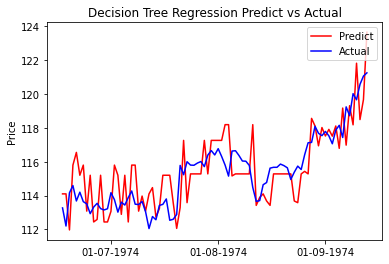

In [38]:
# Build decision tree regressor model

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt = dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

RMSE:  0.7827163711886779
R2 score:  0.8588895013839692


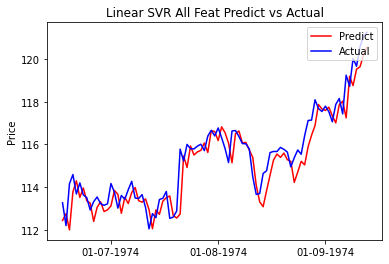

In [39]:
# Support Vector Regressor (SVR)

solution_models = {}

# SVR with linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train, y_train)
validate_result(linear_svr_clf_feat, 'Linear SVR All Feat')

RMSE:  0.7438854386036741
R2 score:  0.8725433186162839


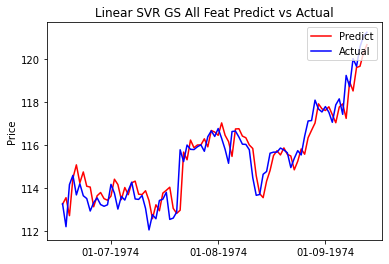

In [40]:
# Hyperparameter Tuning to see any improvement with SVR C and epsilon

linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters, 
                           cv=train_test_split, 
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat, 'Linear SVR GS All Feat')

In [41]:
solution_models['SVR All Feat'] = lsvr_grid_search_feat

RMSE:  0.8079326216429564
R2 score:  0.8496509185835358


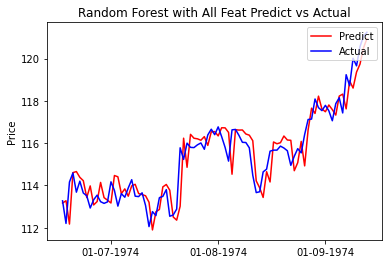

In [42]:
# # Random Forest (rf)

rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train, y_train)
validate_result(random_forest_clf_feat, 'Random Forest with All Feat')

In [43]:
# Hyper parameter tuning with n_estimators, max_features, max_depth

random_forest_parameters = {
    'n_estimators':[10, 15, 20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7, 10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat, 
                                  param_grid=random_forest_parameters,
                                  cv=train_test_split,
)

grid_search_RF_feat.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 20}
RMSE:  0.8500743539948473
R2 score:  0.8335574658345921


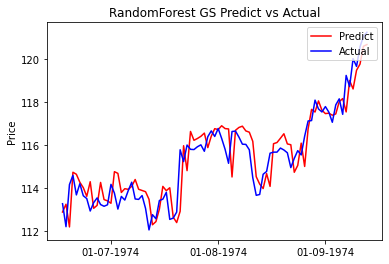

In [44]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat, 'RandomForest GS')

RMSE:  0.7086747009664289
R2 score:  0.8843237104754179


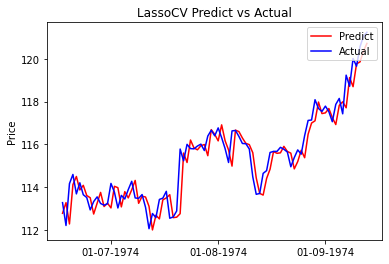

RMSE:  0.7135249847523043
R2 score:  0.8827348775936665


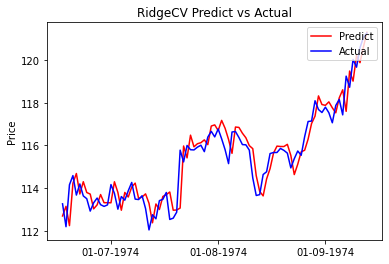

In [45]:
# Lasso and ridge linear regression

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train, y_train)
validate_result(lasso_clf_feat, 'LassoCV')
solution_models['LassoCV All Feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train, y_train)
validate_result(ridge_clf_feat, 'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

RMSE:  0.7135086911165177
R2 score:  0.8827402331268861


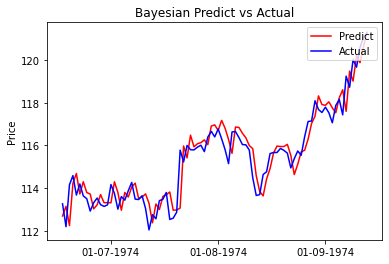

In [46]:
# Bayesian Ridge

bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train, y_train)
validate_result(bay_feat, 'Bayesian')
solution_models['Bay All Feat'] = bay_feat

RMSE:  0.8487279678599466
R2 score:  0.8340842867005283


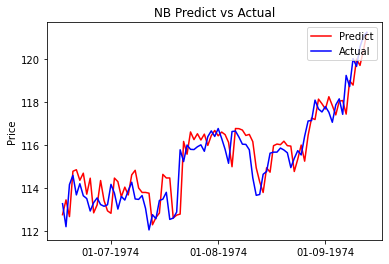

In [47]:
# Gradient Boosting Regressor

regr = GradientBoostingRegressor(n_estimators=70, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train, y_train)
validate_result(GB_feat, 'NB')
solution_models['GB All Feat'] = GB_feat

RMSE:  0.7643632250086986
R2 score:  0.8654294400214576


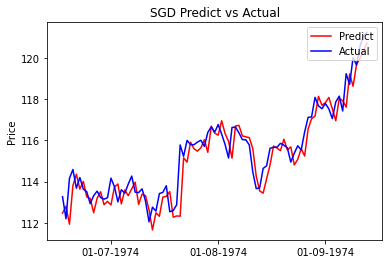

In [48]:
# Stochastic Gradient Descent (SGD)

sgd = SGDRegressor(max_iter=1000, tol=1e-3, loss='squared_epsilon_insensitive', penalty='l1', alpha=0.1)
sgd_feat = sgd.fit(X_train, y_train)
validate_result(sgd_feat, 'SGD')
solution_models['SGD All Feat'] = sgd_feat


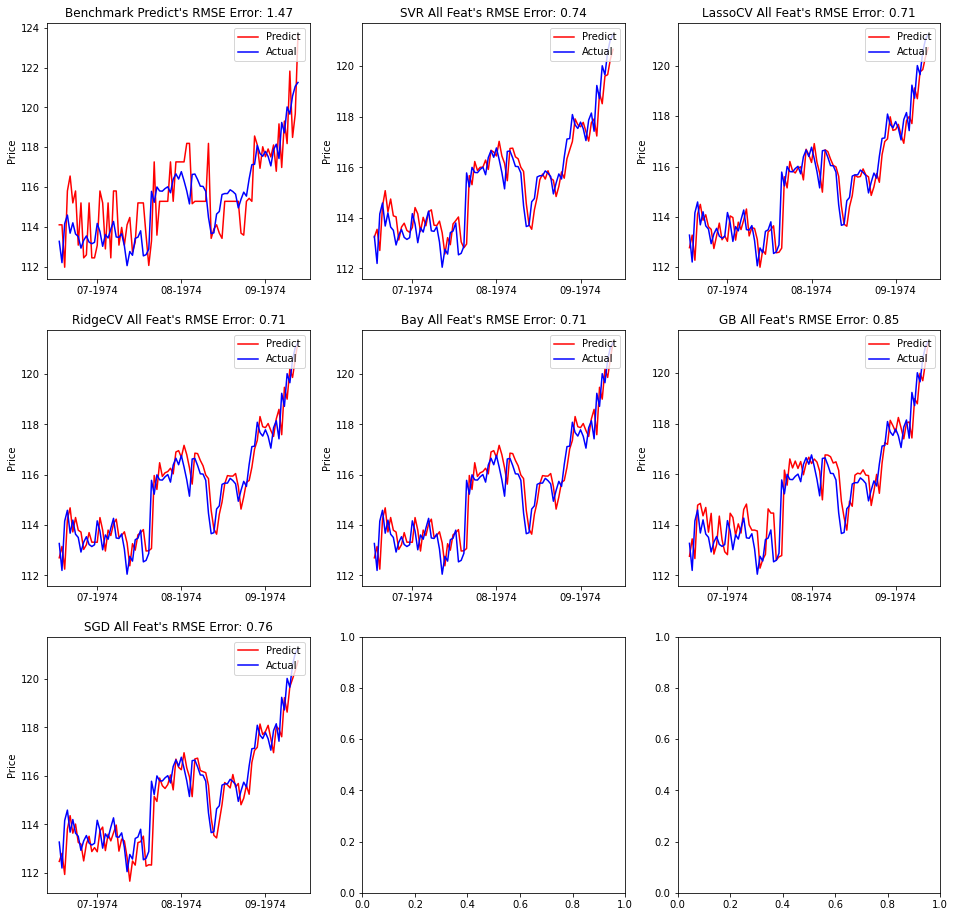

In [49]:
# Review benchmark model and solution model based on evaluation metrics ie. RMSE & R2 Score

RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
    
    # plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted, 'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y, 'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    # plot block
    ax_x = 0
    ax_y = 1
    
    # plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
        
        axes[ax_x][ax_y].plot(validation_y.index, predicted, 'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y, 'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2: 
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()
    
model_review(solution_models)

In [50]:
# SelectFromModel

sfm = SelectFromModel(lasso_clf_feat)
sfm.fit(feature_minmax_transform, target_adj_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform, sup)
print(*zipped)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
33,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.906189,0.093811,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
34,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.916193,0.083807,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
35,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.923859,0.076141,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
36,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.930011,0.069989,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
37,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.935684,0.064316,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


('Open', False) ('High', True) ('Low', True) ('Close', True) ('Adj Close', False) ('Volume', False) ('SP_open', False) ('SP_high', False) ('SP_low', False) ('SP_close', False) ('SP_Ajclose', False) ('SP_volume', False) ('DJ_open', False) ('DJ_high', False) ('DJ_low', False) ('DJ_close', False) ('DJ_Ajclose', False) ('DJ_volume', False) ('EG_open', False) ('EG_high', False) ('EG_low', False) ('EG_close', False) ('EG_Ajclose', False) ('EG_volume', False) ('EU_Price', False) ('EU_open', False) ('EU_high', False) ('EU_low', False) ('EU_Trend', False) ('OF_Price', False) ('OF_Open', False) ('OF_High', False) ('OF_Low', False) ('OF_Volume', False) ('OF_Trend', False) ('OS_Price', False) ('OS_Open', False) ('OS_High', False) ('OS_Low', False) ('OS_Trend', False) ('SF_Price', False) ('SF_Open', False) ('SF_High', False) ('SF_Low', False) ('SF_Volume', False) ('SF_Trend', True) ('USB_Price', False) ('USB_Open', False) ('USB_High', False) ('USB_Low', False) ('USB_Trend', True) ('PLT_Price', Fals

In [51]:
# Selecting Features which supports Model building process

feature_selected = feature_minmax_transform[['Open', 'High', 'Low', 'OF_Trend', 'USB_Trend', 'PLT_Trend', 'USDI_Price', 'GDX_Close', 'SMA', 'Upper_band', 'RSI', 'Open_Close']]
feature_selected_validation_X = validation_X[['Open', 'High', 'Low', 'OF_Trend', 'USB_Trend', 'PLT_Trend', 'USDI_Price', 'GDX_Close', 'SMA', 'Upper_band', 'RSI', 'Open_Close']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

,Open,High,Low,OF_Trend,USB_Trend,PLT_Trend,USDI_Price,GDX_Close,SMA,Upper_band,RSI,Open_Close
33,0.913669,0.912561,0.913193,1.0,0.0,0.0,0.035457,0.974365,0.906189,0.906189,0.807275,0.415010
34,0.919480,0.945539,0.920622,1.0,1.0,1.0,0.015007,0.967677,0.916193,0.916193,0.852413,0.280308
35,0.945490,0.943760,0.925437,1.0,1.0,1.0,0.017368,0.960098,0.923859,0.923859,0.798744,0.477870
36,0.955866,0.949370,0.927775,1.0,1.0,0.0,0.014087,0.953633,0.930011,0.930011,0.777317,0.556766
37,0.907167,0.912014,0.909341,0.0,0.0,1.0,0.037058,0.936692,0.935684,0.935684,0.737688,0.387428


,Open,High,Low,OF_Trend,USB_Trend,PLT_Trend,USDI_Price,GDX_Close,SMA,Upper_band,RSI,Open_Close
1628,0.163946,0.165709,0.167974,1.0,1.0,0.0,0.674324,0.143781,0.169137,0.169137,0.312663,0.413085
1629,0.172524,0.171045,0.176640,1.0,0.0,0.0,0.670362,0.146901,0.166531,0.166531,0.340181,0.436818
1630,0.162701,0.162698,0.162746,0.0,1.0,0.0,0.691652,0.133526,0.163714,0.163714,0.271060,0.459910
1631,0.170587,0.183771,0.178566,1.0,0.0,1.0,0.670842,0.144449,0.163369,0.163369,0.456216,0.370750
1632,0.182623,0.188697,0.191085,1.0,1.0,1.0,0.655675,0.151806,0.163053,0.163053,0.490053,0.398974


In [52]:
# Train test split

for train_index, test_index in train_test_split.split(feature_selected):
       X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
       y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
    

In [62]:
# Validation feature selected benchmark & solution model

def feature_selected_validate_result(model, model_name): 
    predicted = model.predict(feature_selected_validation_X)
    
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('-----------------------')
    
print('-----------Benchmark-----------')
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt_fs = dt.fit(X_train, y_train)
feature_selected_validate_result(benchmark_dt_fs, 'Decision Tree')

feature_selected_solution_models = {}

print('-----------Solution Models------------')

# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0, 
                                           max_depth=3, 
                                           max_features='auto',
                                           n_estimators=10
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100],
    'max_features':['auot', 'sqrt','log2'],
    'max_depth':[3, 5, 7]
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                            param_grid=random_forest_parameters, 
                            cv=train_test_split,
)
grid_search_RF_fs.fit(X_train, y_train)
feature_selected_validate_result(grid_search_RF_fs, 'Feature Selected Random Forest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

# Linear SVR
linear_svr_fs = SVR(
                            C=50.0,
                            epsilon=0,kernel='linear')
linear_svr_clf_fs = linear_svr_fs.fit(X_train, y_train)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs

# lasso 
lasso_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = lasso_fs.fit(X_train, y_train)
feature_selected_validate_result(lasso_clf_fs, 'Feature selected LassCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# ridge
ridge_fs = RidgeCV(gcv_mode='auot')
ridge_clf_fs = ridge_fs.fit(X_train, y_train)
feature_selected_validate_result(ridge_clf_fs, 'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

# bayesian ride
bay = linear_mode.BayesianRidge()
bay_feat_fs = bay.fit(X_train, y_train)
feature_selected_validate_result(bay_feat_fs, 'Feature Selected BayRidge')
feature_selected_solution_models['Bay_Rideg'] = bay_feat_fs

# Gradient boosting
regr = GradientBoostingRegressor(n_estimators=70, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
GB_fs = regr.fit(X_train, y_train)
feature_selected_validate_result(GB_fs, 'Feature Selected GB')
feature_selected_solution_models['GB_FS'] = GB_fs

# SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-3, loss='squared_epsilon_insensitive', penalty='l1', alpha=0.1)
sgd_fs = sgd.fit(X_train, y_train)
feature_selected_validate_result(sgd_fs, 'Feature Selected SGD')
feature_selected_solution_models['sgd_fs'] = sgd_fs

-----------Benchmark-----------
Decision Tree

RMSE:  1.4112657212465294
R2 score:  0.5412584504969526
-----------------------
-----------Solution Models------------
Feature Selected Random Forest GS

RMSE:  0.9134937238116638
R2 score:  0.8077963516466984
-----------------------
Feature selected LSVR

RMSE:  0.7146482120552211
R2 score:  0.8823653907142419
-----------------------
Feature selected LassCV

RMSE:  0.7070014278776258
R2 score:  0.8848693191000379
-----------------------


ValueError: Unknown value for 'gcv_mode'. Got auot instead of one of [None, 'auto', 'svd', 'eigen']

In [ ]:
# Model Review

FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
    
    #plot benchmarker model
    benchmark_dt_predicted = benchmark_dt_fs.predict(feature_selected_validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_dt_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_dt_predicted, 'y', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Erro: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
                        
    # plot block
    ax_x = 0
    ax_y = 1
                        
    # plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
                        
        R2_score = r2_score(validation_y, predicted)
                        
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'y', label='Predict')                
        axes[ax_x][ax_y].plot(validation_y.index, validaton_y,'b', label='Actual') 
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylable('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1 
            else:
                ax_x += 1
                ax_y = 0
    plt.show()
   
fs_model_review(feature_selected_solution_models)

In [61]:
# Creating a Gradient Boosting Model

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

# Make predictions using XGBoost model
preictions = xg_model.predict(X_val)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))

NameError: name 'X_val' is not defined